# GnomAD_df class use example
After each cell There is an explanation of what it is doing

In [1]:
#The first two imports are only for loading the class from it's location.
#they are not necessery
import sys
import os
sys.path.append(os.path.abspath("code"))
# these are  needed-
import pandas as pd
from GnomAD_df_class import GnomAD_df


In [2]:
gdf = GnomAD_df(path='data/main.prq',
                peak_file='data/hATAC_mATAC_peak.bed.gz',
                remove_unkown=True,
                remove_phased_gt=True,
                only_peak_variants=True)
gdf.get_table().head()

applying filters
removing variants outside of peak interval
removed unkwon genotypes (e.g "./.")
replaced phased genotype (e.g "0|1" -> "0/1")
done
getting table


INTERVAL_ID AS22WG009:GT  AS22WG009:DP  \
CHROM POS    REF ALT                                                   
chr1  634112 T   C         PGRA.SER.GRA_1          0/1          86.0   
      778639 A   G    PGRA.SER.GRA.PSER_2          NaN           NaN   
      779047 G   A    PGRA.SER.GRA.PSER_2          1/1          34.0   
      826893 G   A    PGRA.SER.GRA.PSER_3          1/1          30.0   
      827209 G   C    PGRA.SER.GRA.PSER_3          1/1          25.0   

                     AS22WG010:GT  AS22WG010:DP AS22WG011:GT  AS22WG011:DP  \
CHROM POS    REF ALT                                                         
chr1  634112 T   C            0/1          46.0          0/1          46.0   
      778639 A   G            NaN           NaN          NaN           NaN   
      779047 G   A            1/1          20.0          1/1          21.0   
      826893 G   A            0/1          25.0          1/1          22.0   
      827209 G   C            0/1          35.0          1/1          18.0   

                     AS22WG023:GT  AS22WG023:DP AS22WG024:GT  ...  \
CHROM POS    REF ALT                                          ...   
chr1  634112 T   C            0/1          49.0          0/1  ...   
      778639 A   G            NaN           NaN          NaN  ...   
      779047 G   A            1/1          27.0          1/1  ...   
      826893 G   A            1/1          17.0          1/1  ...   
      827209 G   C            1/1          26.0          1/1  ...   

                      PKGen166:GT PKGen166:DP  PKGen177:GT PKGen177:DP  \
CHROM POS    REF ALT                                                     
chr1  634112 T   C            0/1       204.0          1/1       735.0   
      778639 A   G            NaN         NaN          NaN         NaN   
      779047 G   A            1/1        26.0          1/1        27.0   
      826893 G   A            1/1        30.0          1/1        36.0   
      827209 G   C            1/1        43.0          1/1        43.0   

                      PKGen186:GT PKGen186:DP  PKGen172:GT PKGen172:DP  \
CHROM POS    REF ALT                                                     
chr1  634112 T   C            0/1       138.0          1/1       290.0   
      778639 A   G            NaN         NaN          NaN         NaN   
      779047 G   A            1/1        24.0          1/1        23.0   
      826893 G   A            1/1        36.0          1/1        26.0   
      827209 G   C            0/1        31.0          0/1        29.0   

                      PKGen187:GT PKGen187:DP  
CHROM POS    REF ALT                           
chr1  634112 T   C            NaN         NaN  
      778639 A   G            NaN         NaN  
      779047 G   A            1/1        46.0  
      826893 G   A            1/1        36.0  
      827209 G   C            1/1        28.0  

[5 rows x 76 columns]

### Explanation:
The class constructor have only one mandatory variable, the path to the parquet file. <br>
the rest of the argument, except the peak_file (it can be left empty), are the deafult argument. <br>
Variable description:<br>
- peak_file - bed file which contains the following columns - CHROM,FROM,TO,INTERVAL_ID,  (w/o header)
- remove_unknown - add a filter which removes unkwon genotypes (e.g "./.")' 
- remove_phased_gt -  add a filter which replace phased genotype (e.g "0|1" -> "0/1")
- only_peak_variants -  add a filter which removes variants outside of peak interval 
<br>

Whenever get_table or any other function that requeires to apply the filters, only then the class creates a sub dataframe which the filters apllied on it. <br>
During the filteration process, the filter's descriptions will be printed, unless verbos=False. <br>

In [3]:
gdf.reset_table(remove_phased_gt=False,
    remove_unkown=False,
    only_peak_variants=False)
gdf.get_table().head()


applying filters
done
getting table


INTERVAL_ID AS22WG009:GT  AS22WG009:DP AS22WG010:GT  \
CHROM POS   REF ALT                                                       
chr1  10117 C   A           NaN          NaN           NaN          NaN   
      10141 C   A           NaN          NaN           NaN          NaN   
      10146 AC  A           NaN          NaN           NaN          NaN   
      10151 T   A           NaN          NaN           NaN          NaN   
      10153 A   T           NaN          NaN           NaN          NaN   

                     AS22WG010:DP AS22WG011:GT  AS22WG011:DP AS22WG023:GT  \
CHROM POS   REF ALT                                                         
chr1  10117 C   A             NaN          NaN           NaN          NaN   
      10141 C   A             NaN          NaN           NaN          NaN   
      10146 AC  A             NaN          NaN           NaN          NaN   
      10151 T   A             NaN          NaN           NaN          NaN   
      10153 A   T             NaN          NaN           NaN          NaN   

                     AS22WG023:DP AS22WG024:GT  ...  PKGen166:GT PKGen166:DP  \
CHROM POS   REF ALT                             ...                            
chr1  10117 C   A             NaN          NaN  ...          NaN         NaN   
      10141 C   A             NaN          NaN  ...          NaN         NaN   
      10146 AC  A             NaN          1/1  ...          NaN         NaN   
      10151 T   A             NaN          NaN  ...          NaN         NaN   
      10153 A   T             NaN          NaN  ...          NaN         NaN   

                     PKGen177:GT PKGen177:DP  PKGen186:GT PKGen186:DP  \
CHROM POS   REF ALT                                                     
chr1  10117 C   A            NaN         NaN          NaN         NaN   
      10141 C   A            NaN         NaN          NaN         NaN   
      10146 AC  A            NaN         NaN          NaN         NaN   
      10151 T   A            NaN         NaN          NaN         NaN   
      10153 A   T            NaN         NaN          NaN         NaN   

                     PKGen172:GT PKGen172:DP  PKGen187:GT PKGen187:DP  
CHROM POS   REF ALT                                                    
chr1  10117 C   A            NaN         NaN          NaN         NaN  
      10141 C   A            NaN         NaN          NaN         NaN  
      10146 AC  A            NaN         NaN          NaN         NaN  
      10151 T   A            NaN         NaN          NaN         NaN  
      10153 A   T            NaN         NaN          NaN         NaN  

[5 rows x 76 columns]

### Explanation:
In the cell below, No filter was applied. The original table is shown. <br>
Now lets filter it up!

In [4]:
gdf.remove_non_peak_variants()
gdf.remove_phasing()
gdf.remove_unkown()
gdf.get_table().head()

applying filters
removing variants outside of peak interval
replaced phased genotype (e.g "0|1" -> "0/1")
removed unkwon genotypes (e.g "./.")
done
getting table


INTERVAL_ID AS22WG009:GT  AS22WG009:DP  \
CHROM POS    REF ALT                                                   
chr1  634112 T   C         PGRA.SER.GRA_1          0/1          86.0   
      778639 A   G    PGRA.SER.GRA.PSER_2          NaN           NaN   
      779047 G   A    PGRA.SER.GRA.PSER_2          1/1          34.0   
      826893 G   A    PGRA.SER.GRA.PSER_3          1/1          30.0   
      827209 G   C    PGRA.SER.GRA.PSER_3          1/1          25.0   

                     AS22WG010:GT  AS22WG010:DP AS22WG011:GT  AS22WG011:DP  \
CHROM POS    REF ALT                                                         
chr1  634112 T   C            0/1          46.0          0/1          46.0   
      778639 A   G            NaN           NaN          NaN           NaN   
      779047 G   A            1/1          20.0          1/1          21.0   
      826893 G   A            0/1          25.0          1/1          22.0   
      827209 G   C            0/1          35.0          1/1          18.0   

                     AS22WG023:GT  AS22WG023:DP AS22WG024:GT  ...  \
CHROM POS    REF ALT                                          ...   
chr1  634112 T   C            0/1          49.0          0/1  ...   
      778639 A   G            NaN           NaN          NaN  ...   
      779047 G   A            1/1          27.0          1/1  ...   
      826893 G   A            1/1          17.0          1/1  ...   
      827209 G   C            1/1          26.0          1/1  ...   

                      PKGen166:GT PKGen166:DP  PKGen177:GT PKGen177:DP  \
CHROM POS    REF ALT                                                     
chr1  634112 T   C            0/1       204.0          1/1       735.0   
      778639 A   G            NaN         NaN          NaN         NaN   
      779047 G   A            1/1        26.0          1/1        27.0   
      826893 G   A            1/1        30.0          1/1        36.0   
      827209 G   C            1/1        43.0          1/1        43.0   

                      PKGen186:GT PKGen186:DP  PKGen172:GT PKGen172:DP  \
CHROM POS    REF ALT                                                     
chr1  634112 T   C            0/1       138.0          1/1       290.0   
      778639 A   G            NaN         NaN          NaN         NaN   
      779047 G   A            1/1        24.0          1/1        23.0   
      826893 G   A            1/1        36.0          1/1        26.0   
      827209 G   C            0/1        31.0          0/1        29.0   

                      PKGen187:GT PKGen187:DP  
CHROM POS    REF ALT                           
chr1  634112 T   C            NaN         NaN  
      778639 A   G            NaN         NaN  
      779047 G   A            1/1        46.0  
      826893 G   A            1/1        36.0  
      827209 G   C            1/1        28.0  

[5 rows x 76 columns]

### Explanation:
Magic! We got the same table from 2 cells ago! <br>
Notice that the order of filteration changed. This is important, if we would like to remove a filter, we can do it by it's index. <br>
Of course there is a simple way to know the filters index... <br>

Lets see:

In [5]:
gdf.reset_table(remove_phased_gt=True,
    remove_unkown=True,
    only_peak_variants=True)
display(gdf.get_table().head())
gdf.filter_DP(31)
print('\n')
print("look on AS22WG009:GT, 4th & 5th row, \n it's written NaN since we filtered according to dp thrshold of 31 and above ")
print('\n')
display(gdf.get_table().head())


applying filters
removing variants outside of peak interval
replaced phased genotype (e.g "0|1" -> "0/1")
removed unkwon genotypes (e.g "./.")
done
getting table


INTERVAL_ID AS22WG009:GT  AS22WG009:DP  \
CHROM POS    REF ALT                                                   
chr1  634112 T   C         PGRA.SER.GRA_1          0/1          86.0   
      778639 A   G    PGRA.SER.GRA.PSER_2          NaN           NaN   
      779047 G   A    PGRA.SER.GRA.PSER_2          1/1          34.0   
      826893 G   A    PGRA.SER.GRA.PSER_3          1/1          30.0   
      827209 G   C    PGRA.SER.GRA.PSER_3          1/1          25.0   

                     AS22WG010:GT  AS22WG010:DP AS22WG011:GT  AS22WG011:DP  \
CHROM POS    REF ALT                                                         
chr1  634112 T   C            0/1          46.0          0/1          46.0   
      778639 A   G            NaN           NaN          NaN           NaN   
      779047 G   A            1/1          20.0          1/1          21.0   
      826893 G   A            0/1          25.0          1/1          22.0   
      827209 G   C            0/1          35.0          1/1          18.0   

                     AS22WG023:GT  AS22WG023:DP AS22WG024:GT  ...  \
CHROM POS    REF ALT                                          ...   
chr1  634112 T   C            0/1          49.0          0/1  ...   
      778639 A   G            NaN           NaN          NaN  ...   
      779047 G   A            1/1          27.0          1/1  ...   
      826893 G   A            1/1          17.0          1/1  ...   
      827209 G   C            1/1          26.0          1/1  ...   

                      PKGen166:GT PKGen166:DP  PKGen177:GT PKGen177:DP  \
CHROM POS    REF ALT                                                     
chr1  634112 T   C            0/1       204.0          1/1       735.0   
      778639 A   G            NaN         NaN          NaN         NaN   
      779047 G   A            1/1        26.0          1/1        27.0   
      826893 G   A            1/1        30.0          1/1        36.0   
      827209 G   C            1/1        43.0          1/1        43.0   

                      PKGen186:GT PKGen186:DP  PKGen172:GT PKGen172:DP  \
CHROM POS    REF ALT                                                     
chr1  634112 T   C            0/1       138.0          1/1       290.0   
      778639 A   G            NaN         NaN          NaN         NaN   
      779047 G   A            1/1        24.0          1/1        23.0   
      826893 G   A            1/1        36.0          1/1        26.0   
      827209 G   C            0/1        31.0          0/1        29.0   

                      PKGen187:GT PKGen187:DP  
CHROM POS    REF ALT                           
chr1  634112 T   C            NaN         NaN  
      778639 A   G            NaN         NaN  
      779047 G   A            1/1        46.0  
      826893 G   A            1/1        36.0  
      827209 G   C            1/1        28.0  

[5 rows x 76 columns]



look on AS22WG009:GT, 4th & 5th row, 
 it's written NaN since we filtered according to dp thrshold of 31 and above 


applying filters
removing variants outside of peak interval
replaced phased genotype (e.g "0|1" -> "0/1")
removed unkwon genotypes (e.g "./.")
Removing variants with reading depth 31 or below
done
getting table


INTERVAL_ID AS22WG009:GT  AS22WG009:DP  \
CHROM POS    REF ALT                                                   
chr1  634112 T   C         PGRA.SER.GRA_1          0/1          86.0   
      778639 A   G    PGRA.SER.GRA.PSER_2          NaN           NaN   
      779047 G   A    PGRA.SER.GRA.PSER_2          1/1          34.0   
      826893 G   A    PGRA.SER.GRA.PSER_3          NaN          30.0   
      827209 G   C    PGRA.SER.GRA.PSER_3          NaN          25.0   

                     AS22WG010:GT  AS22WG010:DP AS22WG011:GT  AS22WG011:DP  \
CHROM POS    REF ALT                                                         
chr1  634112 T   C            0/1          46.0          0/1          46.0   
      778639 A   G            NaN           NaN          NaN           NaN   
      779047 G   A            NaN          20.0          NaN          21.0   
      826893 G   A            NaN          25.0          NaN          22.0   
      827209 G   C            0/1          35.0          NaN          18.0   

                     AS22WG023:GT  AS22WG023:DP AS22WG024:GT  ...  \
CHROM POS    REF ALT                                          ...   
chr1  634112 T   C            0/1          49.0          0/1  ...   
      778639 A   G            NaN           NaN          NaN  ...   
      779047 G   A            NaN          27.0          NaN  ...   
      826893 G   A            NaN          17.0          NaN  ...   
      827209 G   C            NaN          26.0          1/1  ...   

                      PKGen166:GT PKGen166:DP  PKGen177:GT PKGen177:DP  \
CHROM POS    REF ALT                                                     
chr1  634112 T   C            0/1       204.0          1/1       735.0   
      778639 A   G            NaN         NaN          NaN         NaN   
      779047 G   A            NaN        26.0          NaN        27.0   
      826893 G   A            NaN        30.0          1/1        36.0   
      827209 G   C            1/1        43.0          1/1        43.0   

                      PKGen186:GT PKGen186:DP  PKGen172:GT PKGen172:DP  \
CHROM POS    REF ALT                                                     
chr1  634112 T   C            0/1       138.0          1/1       290.0   
      778639 A   G            NaN         NaN          NaN         NaN   
      779047 G   A            NaN        24.0          NaN        23.0   
      826893 G   A            1/1        36.0          NaN        26.0   
      827209 G   C            NaN        31.0          NaN        29.0   

                      PKGen187:GT PKGen187:DP  
CHROM POS    REF ALT                           
chr1  634112 T   C            NaN         NaN  
      778639 A   G            NaN         NaN  
      779047 G   A            1/1        46.0  
      826893 G   A            1/1        36.0  
      827209 G   C            NaN        28.0  

[5 rows x 76 columns]

Since our real threshold is 10, we need to fix it. <br>
1st we need to find the index of the filter

In [6]:
print("current filters:")
gdf.print_filters()
print("\n lets remove filter no 3")
gdf.remove_filter(3)
print('\n current filters: ')
gdf.get_table().head()

current filters:
0. removing variants outside of peak interval
1. replaced phased genotype (e.g "0|1" -> "0/1")
2. removed unkwon genotypes (e.g "./.")
3. Removing variants with reading depth 31 or below

 lets remove filter no 3

 current filters: 
applying filters
removing variants outside of peak interval
replaced phased genotype (e.g "0|1" -> "0/1")
removed unkwon genotypes (e.g "./.")
done
getting table


INTERVAL_ID AS22WG009:GT  AS22WG009:DP  \
CHROM POS    REF ALT                                                   
chr1  634112 T   C         PGRA.SER.GRA_1          0/1          86.0   
      778639 A   G    PGRA.SER.GRA.PSER_2          NaN           NaN   
      779047 G   A    PGRA.SER.GRA.PSER_2          1/1          34.0   
      826893 G   A    PGRA.SER.GRA.PSER_3          1/1          30.0   
      827209 G   C    PGRA.SER.GRA.PSER_3          1/1          25.0   

                     AS22WG010:GT  AS22WG010:DP AS22WG011:GT  AS22WG011:DP  \
CHROM POS    REF ALT                                                         
chr1  634112 T   C            0/1          46.0          0/1          46.0   
      778639 A   G            NaN           NaN          NaN           NaN   
      779047 G   A            1/1          20.0          1/1          21.0   
      826893 G   A            0/1          25.0          1/1          22.0   
      827209 G   C            0/1          35.0          1/1          18.0   

                     AS22WG023:GT  AS22WG023:DP AS22WG024:GT  ...  \
CHROM POS    REF ALT                                          ...   
chr1  634112 T   C            0/1          49.0          0/1  ...   
      778639 A   G            NaN           NaN          NaN  ...   
      779047 G   A            1/1          27.0          1/1  ...   
      826893 G   A            1/1          17.0          1/1  ...   
      827209 G   C            1/1          26.0          1/1  ...   

                      PKGen166:GT PKGen166:DP  PKGen177:GT PKGen177:DP  \
CHROM POS    REF ALT                                                     
chr1  634112 T   C            0/1       204.0          1/1       735.0   
      778639 A   G            NaN         NaN          NaN         NaN   
      779047 G   A            1/1        26.0          1/1        27.0   
      826893 G   A            1/1        30.0          1/1        36.0   
      827209 G   C            1/1        43.0          1/1        43.0   

                      PKGen186:GT PKGen186:DP  PKGen172:GT PKGen172:DP  \
CHROM POS    REF ALT                                                     
chr1  634112 T   C            0/1       138.0          1/1       290.0   
      778639 A   G            NaN         NaN          NaN         NaN   
      779047 G   A            1/1        24.0          1/1        23.0   
      826893 G   A            1/1        36.0          1/1        26.0   
      827209 G   C            0/1        31.0          0/1        29.0   

                      PKGen187:GT PKGen187:DP  
CHROM POS    REF ALT                           
chr1  634112 T   C            NaN         NaN  
      778639 A   G            NaN         NaN  
      779047 G   A            1/1        46.0  
      826893 G   A            1/1        36.0  
      827209 G   C            1/1        28.0  

[5 rows x 76 columns]

Yay :) the table looks similar to the original! <br>
<br>
## Example : Filtering the table according to thresholds

After the short torturial above, see how easily is to achive a table which contains variants acoording to given thresholds.<br>
Let's say we want only variants with reading depth (DP) > 10 & gnomAD allele frequency < 0.01 <br>
First, lts see how many variant each sample have before applying the filters:    

In [7]:
gdf.reset_table() # make sure we cleaned all the mess from the cell above

print('first step: getting a boolean table, which suggest if a sample have a variant or not\n')
bool_df = gdf.bool_variant_df()
display(bool_df.head())
print('\nNow lets count how many variants the first 5 sample have -')
all_v = bool_df.drop(columns=['AF','INTERVAL_ID']).sum().head()
display(all_v)


first step: getting a boolean table, which suggest if a sample have a variant or not

removing variants outside of peak interval
replaced phased genotype (e.g "0|1" -> "0/1")
removed unkwon genotypes (e.g "./.")
done


AF          INTERVAL_ID  AS22WG009  AS22WG010  \
CHROM POS    REF ALT                                                        
chr1  634112 T   C    0.581946       PGRA.SER.GRA_1       True       True   
      778639 A   G    0.127933  PGRA.SER.GRA.PSER_2      False      False   
      779047 G   A    0.819806  PGRA.SER.GRA.PSER_2       True       True   
      826893 G   A    0.730133  PGRA.SER.GRA.PSER_3       True       True   
      827209 G   C    0.739536  PGRA.SER.GRA.PSER_3       True       True   

                      AS22WG011  AS22WG023  AS22WG024  AS22WG004  AS22WG005  \
CHROM POS    REF ALT                                                          
chr1  634112 T   C         True       True       True       True       True   
      778639 A   G        False      False      False      False      False   
      779047 G   A         True       True       True       True       True   
      826893 G   A         True       True       True       True       True   
      827209 G   C         True       True       True       True       True   

                      AS22WG006  ...  PKGen169  PKGen176  PKGen171  PKGen185  \
CHROM POS    REF ALT             ...                                           
chr1  634112 T   C         True  ...      True      True      True      True   
      778639 A   G        False  ...     False     False     False      True   
      779047 G   A         True  ...      True      True      True      True   
      826893 G   A         True  ...      True      True      True     False   
      827209 G   C         True  ...      True      True      True     False   

                      PKGen182  PKGen166  PKGen177  PKGen186  PKGen172  \
CHROM POS    REF ALT                                                     
chr1  634112 T   C        True      True      True      True      True   
      778639 A   G       False     False     False     False     False   
      779047 G   A        True      True      True      True      True   
      826893 G   A        True      True      True      True      True   
      827209 G   C        True      True      True      True      True   

                      PKGen187  
CHROM POS    REF ALT            
chr1  634112 T   C       False  
      778639 A   G       False  
      779047 G   A        True  
      826893 G   A        True  
      827209 G   C        True  

[5 rows x 39 columns]


Now lets count how many variants the first 5 sample have -


AS22WG009    39517
AS22WG010    36498
AS22WG011    36302
AS22WG023    36770
AS22WG024    36837
dtype: int64

Lets apply the filters:

In [8]:
DP_t = 10 
AF_t = 0.01
gdf.filter_DP(DP_t)
gdf.filter_AF(AF_t, remove_unkwon=True)
bool_df = gdf.bool_variant_df()
print('\nNow lets count how many variants the first 5 sample have -')
filter_v = bool_df.drop(columns=['AF','INTERVAL_ID']).sum().head()
display(pd.concat([all_v.rename('total_variants'),filter_v.rename("DP > 10 & AF < 0.01")], axis=1))


removing variants outside of peak interval
replaced phased genotype (e.g "0|1" -> "0/1")
removed unkwon genotypes (e.g "./.")
Removing variants with reading depth 10 or below
Removing variants with allele frequency above 0.01 and variants with no record on gnomAD
done

Now lets count how many variants the first 5 sample have -


,total_variants,DP > 10 & AF < 0.01
AS22WG009,39517,179
AS22WG010,36498,103
AS22WG011,36302,91
AS22WG023,36770,30
AS22WG024,36837,42


Notice the  remove_unkwon variable in 'filter_AF' function. If set to 'True' (default is 'False'), variants without reported allele frequency in gnomAD will be removed. <br>

Since I love one liner, pipping is also possible :) <br>
Let's do the same with less lines of code! <br>
(Note: The following is just POC, this is a bad example of code writing)

In [9]:
gdf.reset_table()
filter_v = gdf.filter_DP(DP_t).filter_AF(AF_t,  remove_unkwon=True).bool_variant_df().drop(columns=['AF','INTERVAL_ID']).sum().head()
display(pd.concat([all_v.rename('total_variants'),filter_v.rename("DP > 10 & AF < 0.01")], axis=1))

removing variants outside of peak interval
replaced phased genotype (e.g "0|1" -> "0/1")
removed unkwon genotypes (e.g "./.")
Removing variants with reading depth 10 or below
Removing variants with allele frequency above 0.01 and variants with no record on gnomAD
done


,total_variants,DP > 10 & AF < 0.01
AS22WG009,39517,179
AS22WG010,36498,103
AS22WG011,36302,91
AS22WG023,36770,30
AS22WG024,36837,42


Since the function of getting the amount of variant in each sample is something we want to do often, there is a function that does that. <br>
so to summrise it all, a general pipline is:
1. load the parquet file into the class object (remember to adjust default filters if needed)
2. apply the filters  - AF,DP & some more filters avaiable
3. get the amount of varints in each sample (or other data :) )
<br>

## Final example - Getting the amount of variant in each samples

In [10]:
gdf = GnomAD_df(path='data/main.prq',
                peak_file='data/hATAC_mATAC_peak.bed.gz',
                remove_unkown=True,
                remove_phased_gt=True,
                only_peak_variants=False)

In [11]:
# # getting the total amount of variants for each sample
all_v = gdf.count_sample_variants(verbos=True).rename('all_variants')

# # getting the amount of variants only in ATAC intervals
only_interval = gdf.remove_non_peak_variants().count_sample_variants(verbos=True).rename('interval_variants')

# # getting the amount of variants in interval & AF < 0.01
af_v = gdf.filter_AF(AF_t).count_sample_variants(verbos=True).rename('interval_variants_AF<0.01')

# # getting the amount of variants in interval & DP > 10
dp_v = gdf.remove_filter(-1).filter_DP(DP_t).count_sample_variants(verbos=True).rename('interval_variants_DP>10') 

#
both_v =  gdf.filter_AF(AF_t).count_sample_variants(verbos=True).rename('interval_variants_AF<0.01_DP>10')
print("the amount of variants each sample have in the hATAC interval - ")



removed unkwon genotypes (e.g "./.")
replaced phased genotype (e.g "0|1" -> "0/1")
done
removed unkwon genotypes (e.g "./.")
replaced phased genotype (e.g "0|1" -> "0/1")
removing variants outside of peak interval
done
removed unkwon genotypes (e.g "./.")
replaced phased genotype (e.g "0|1" -> "0/1")
removing variants outside of peak interval
Removing variants with allele frequency above 0.01
done
removed unkwon genotypes (e.g "./.")
replaced phased genotype (e.g "0|1" -> "0/1")
removing variants outside of peak interval
Removing variants with reading depth 10 or below
done
removed unkwon genotypes (e.g "./.")
replaced phased genotype (e.g "0|1" -> "0/1")
removing variants outside of peak interval
Removing variants with reading depth 10 or below
Removing variants with allele frequency above 0.01
done
the amount of variants each sample have in the hATAC interval - 


['PKGen162',
 'PKGen160',
 'PKGen164',
 'PKGen169',
 'PKGen176',
 'PKGen171',
 'PKGen185',
 'PKGen182',
 'PKGen166',
 'PKGen177',
 'PKGen186',
 'PKGen172',
 'PKGen187']

In [18]:
# count_df = pd.concat([all_v, only_interval,af_v, dp_v,both_v], axis=1)
order = ["AS22WG001","AS22WG002","AS22WG003","AS22WG004","AS22WG005","AS22WG006","AS22WG007","AS22WG008","AS22WG009",
         "AS22WG010","AS22WG011","AS22WG012","AS22WG013","AS22WG014","AS22WG015","AS22WG016","AS22WG017","AS22WG018",
         "AS22WG019","AS22WG020","AS22WG021","AS22WG022","AS22WG023", "AS22WG024"] + [i for i in count_df.index.tolist() if i.startswith('P')]
count_df = count_df.loc[order,:]
display(count_df)

,all_variants,interval_variants,interval_variants_AF<0.01,interval_variants_DP>10,interval_variants_AF<0.01_DP>10
AS22WG001,2691561,36959,175,36157,168
AS22WG002,2115915,34582,152,33738,147
AS22WG003,2115050,34645,156,33036,146
AS22WG004,5053273,34043,152,33396,149
AS22WG005,4987121,33925,151,33201,146
AS22WG006,4974219,33941,160,32905,156
AS22WG007,5053549,34027,157,33671,155
AS22WG008,5061690,34342,144,33644,140
AS22WG009,2699664,39517,364,38576,345
AS22WG010,2116770,36498,260,35764,251


<AxesSubplot:>

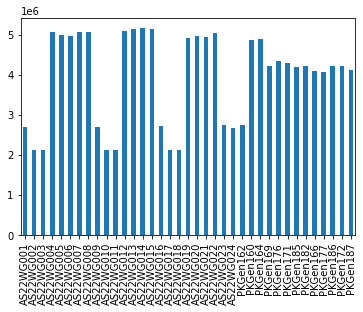

In [19]:
count_df['all_variants'].plot.bar()

## New AF pipeline compare  <a class='anchor' id='new_AF'></a>
This part will comapre the amount of varian